In [1]:

# Pandas and Numpy for data structures and util fucntions
import scipy as sp
import numpy as np
import pandas as pd
from numpy.random import rand
pd.options.display.max_colwidth = 600

# Scikit Imports
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

import cnn_utils as utils
from model_evaluation_utils import get_metrics

# Matplot Imports
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

# pandas display data frames as tables
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
np.random.seed(1337)
from keras import callbacks
from keras import optimizers
#from keras.datasets import cifar10
from keras.engine import Model
from keras.applications import vgg16 as vgg
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

import os

Using TensorFlow backend.


In [3]:

BATCH_SIZE = 32
EPOCHS = 40
NUM_CLASSES = 11
LEARNING_RATE = 1e-4
MOMENTUM = 0.9

Number of training samples:  1317
Number of test samples:  330
y = 10
number of training examples = 1119
number of test examples = 330
X_train shape: (1119, 128, 128, 3)
Y_train shape: (1119, 11)
X_test shape: (330, 128, 128, 3)
Y_test shape: (330, 11)


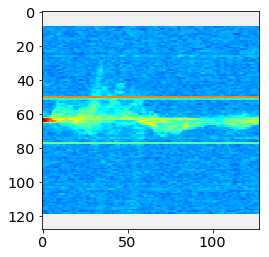

In [4]:
import h5py
hdf5_path = 'cl11.hdf5' 
#hdf5_path = 'tobb_dataset_128x128.hdf5'
dataset = h5py.File(hdf5_path, "r")



Y_test_orig = np.array(dataset["test_labels"])
Y_train_orig = np.array(dataset["train_labels"])
X_train_orig = np.array(dataset["train_img"])
X_test_orig = np.array(dataset["test_img"])

print('Number of training samples: ', len(X_train_orig))
print('Number of test samples: ', len(X_test_orig))

# Example of a picture
index = 14
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[index])))


X_train = X_train_orig/255.
X_test = X_test_orig/255.

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  Y_train_orig, 
                                                  test_size=0.15, 
                                                  stratify=np.array(Y_train_orig), 
                                                  random_state=42)


NUM_CLASSES=11;

Y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
Y_val = np_utils.to_categorical(y_val, NUM_CLASSES)
Y_test = np_utils.to_categorical(Y_test_orig, NUM_CLASSES)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

In [5]:
import h5py
hdf5_path1 = '10ghz_11class_128x128.hdf5' 
#hdf5_path = 'tobb_dataset_128x128.hdf5'
dataset10 = h5py.File(hdf5_path1, "r")

hdf5_path2 = '77ghz_11class_128x128.hdf5'
dataset77    = h5py.File(hdf5_path2, "r")

Y_test_orig10 = np.array(dataset10["test_labels"])
Y_train_orig10 = np.array(dataset10["train_labels"])
X_train_orig10 = np.array(dataset10["train_img"])
X_test_orig10 = np.array(dataset10["test_img"])

Y_test_orig77 = np.array(dataset77["test_labels"])
Y_train_orig77 = np.array(dataset77["train_labels"])
X_train_orig77 = np.array(dataset77["train_img"])
X_test_orig77 = np.array(dataset77["test_img"])


#print('Number of training samples: ', len(X_train_orig))
#print('Number of test samples: ', len(X_test_orig))

# Example of a picture


X_train10 = X_train_orig10/255.
X_test10 = X_test_orig10/255.

X_train77 = X_train_orig77/255.
X_test77 = X_test_orig77/255.



NUM_CLASSES=11;

Y_train10 = np_utils.to_categorical(Y_train_orig10, NUM_CLASSES)
#Y_val = np_utils.to_categorical(y_val, NUM_CLASSES)
Y_test10 = np_utils.to_categorical(Y_test_orig10, NUM_CLASSES)

print ("no. 10GHztraining examples = " + str(X_train10.shape[0]))
print ("number of 10GHztest examples = " + str(X_test10.shape[0]))
print ("X_train shape: " + str(X_train10.shape))
print ("Y_train shape: " + str(Y_train10.shape))
print ("X_test shape: " + str(X_test10.shape))
print ("Y_test shape: " + str(Y_test10.shape))


Y_train77 = np_utils.to_categorical(Y_train_orig77, NUM_CLASSES)
#Y_val = np_utils.to_categorical(y_val, NUM_CLASSES)
Y_test77 = np_utils.to_categorical(Y_test_orig77, NUM_CLASSES)
print ("number of training examples = " + str(X_train77.shape[0]))
print ("number of test examples = " + str(X_test77.shape[0]))
print ("X_train shape: " + str(X_train77.shape))
print ("Y_train shape: " + str(Y_train77.shape))
print ("X_test shape: " + str(X_test77.shape))
print ("Y_test shape: " + str(Y_test77.shape))

no. 10GHztraining examples = 588
number of 10GHztest examples = 147
X_train shape: (588, 128, 128, 3)
Y_train shape: (588, 11)
X_test shape: (147, 128, 128, 3)
Y_test shape: (147, 11)
number of training examples = 519
number of test examples = 130
X_train shape: (519, 128, 128, 3)
Y_train shape: (519, 11)
X_test shape: (130, 128, 128, 3)
Y_test shape: (130, 11)


# Prepare the Model 
    Load VGG16 without the top classification layer 
    Prepare a custom classifier 
    Stack both models on top of each other


In [6]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Or 2, 3, etc. other than 0
base_model = vgg.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [7]:
# Extract the last layer from third block of vgg16 model
last = base_model.get_layer('block3_pool').output

In [8]:
epochs = [100]
batch_size = [8,16]
dense_1 = [64, 64, 128, 128, 256, 256]
dense_2 = [32, 64, 64, 128, 128, 256]
learn_rate = [0.0002, 0.0001]
acc_hist = []
hist_hist = []
drop = [0.5]

for i in range(len(epochs)):
    for j in range(len(batch_size)):
        for k in range(len(dense_1)):
            for m in range(len(learn_rate)):
                for n in range(len(drop)):

                     x = GlobalAveragePooling2D()(last)
                     x = BatchNormalization()(x)
                     x = Dense(dense_1[k], activation='relu')(x)
                     x = Dense(dense_2[k], activation='relu')(x)
                     x = Dropout(drop[n])(x)
                     pred = Dense(NUM_CLASSES, activation='softmax')(x)
                     model = Model(base_model.input, pred)
                     for layer in base_model.layers:
                         layer.trainable = False
                     model.compile(loss='binary_crossentropy',
                                   optimizer=optimizers.Adam(lr=learn_rate[m], decay = 1e-06),
                                             metrics=['categorical_accuracy'])

                     history = model.fit(X_train, Y_train, epochs = epochs[i], validation_data = (X_test,Y_test),  batch_size = batch_size[j], verbose=1)
                     acc = history.history['categorical_accuracy'][-1]
                     acc_hist.append(acc)
                     hist_hist.append(history.history)
                     print('Params for 24 GHz: epochs= '+str(epochs[i])+', batch_size= '+str(batch_size[j])+
                          ', dense_1= '+str(dense_1[k])+', dense_2= '+str(dense_2[k])+', learn_rate= '+str(learn_rate[m])+
                          ', Accuracy='+str(acc))
                     preds = model.evaluate(X_test, Y_test)
                     print ("Loss = " + str(preds[0]))
                     print ("Test Accuracy = " + str(preds[1]))

Train on 1119 samples, validate on 330 samples
Epoch 1/100
1119/1119 [==============================] - 16s 14ms/step - loss: 0.3048 - categorical_accuracy: 0.1886 - val_loss: 0.2926 - val_categorical_accuracy: 0.1576
Epoch 2/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.2787 - categorical_accuracy: 0.2234 - val_loss: 0.2582 - val_categorical_accuracy: 0.3182
Epoch 3/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.2671 - categorical_accuracy: 0.2878 - val_loss: 0.2438 - val_categorical_accuracy: 0.3909
Epoch 4/100
1119/1119 [==============================] - 12s 11ms/step - loss: 0.2451 - categorical_accuracy: 0.3494 - val_loss: 0.2251 - val_categorical_accuracy: 0.4727
Epoch 5/100
1119/1119 [==============================] - 15s 14ms/step - loss: 0.2446 - categorical_accuracy: 0.3450 - val_loss: 0.2159 - val_categorical_accuracy: 0.4909
Epoch 6/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.2356 - categorica

1119/1119 [==============================] - 15s 13ms/step - loss: 0.1412 - categorical_accuracy: 0.6720 - val_loss: 0.1168 - val_categorical_accuracy: 0.7515
Epoch 49/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.1404 - categorical_accuracy: 0.6559 - val_loss: 0.1187 - val_categorical_accuracy: 0.7424
Epoch 50/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1361 - categorical_accuracy: 0.6685 - val_loss: 0.1162 - val_categorical_accuracy: 0.7636
Epoch 51/100
1119/1119 [==============================] - 15s 14ms/step - loss: 0.1360 - categorical_accuracy: 0.6747 - val_loss: 0.1151 - val_categorical_accuracy: 0.7667
Epoch 52/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1372 - categorical_accuracy: 0.6693 - val_loss: 0.1130 - val_categorical_accuracy: 0.7758
Epoch 53/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1313 - categorical_accuracy: 0.6971 - val_loss: 0.1125 - val_categorica

Epoch 96/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1043 - categorical_accuracy: 0.7730 - val_loss: 0.1026 - val_categorical_accuracy: 0.8212
Epoch 97/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1108 - categorical_accuracy: 0.7426 - val_loss: 0.0985 - val_categorical_accuracy: 0.8182
Epoch 98/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.1061 - categorical_accuracy: 0.7578 - val_loss: 0.1041 - val_categorical_accuracy: 0.8061
Epoch 99/100
1119/1119 [==============================] - 15s 14ms/step - loss: 0.1089 - categorical_accuracy: 0.7516 - val_loss: 0.0990 - val_categorical_accuracy: 0.8121
Epoch 100/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1065 - categorical_accuracy: 0.7596 - val_loss: 0.1012 - val_categorical_accuracy: 0.8030
Params for 24 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 32, learn_rate= 0.0002, Accuracy=0.7596068
330/330 [==================

1119/1119 [==============================] - 14s 13ms/step - loss: 0.1746 - categorical_accuracy: 0.5612 - val_loss: 0.1474 - val_categorical_accuracy: 0.6758
Epoch 43/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.1743 - categorical_accuracy: 0.5764 - val_loss: 0.1449 - val_categorical_accuracy: 0.6970
Epoch 44/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1722 - categorical_accuracy: 0.5737 - val_loss: 0.1451 - val_categorical_accuracy: 0.7121
Epoch 45/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1776 - categorical_accuracy: 0.5541 - val_loss: 0.1436 - val_categorical_accuracy: 0.7030
Epoch 46/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1780 - categorical_accuracy: 0.5576 - val_loss: 0.1445 - val_categorical_accuracy: 0.7061
Epoch 47/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1716 - categorical_accuracy: 0.5800 - val_loss: 0.1427 - val_categorica

Epoch 90/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1342 - categorical_accuracy: 0.6917 - val_loss: 0.1190 - val_categorical_accuracy: 0.7576
Epoch 91/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1387 - categorical_accuracy: 0.6685 - val_loss: 0.1186 - val_categorical_accuracy: 0.7727
Epoch 92/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1442 - categorical_accuracy: 0.6506 - val_loss: 0.1194 - val_categorical_accuracy: 0.7758
Epoch 93/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1353 - categorical_accuracy: 0.6988 - val_loss: 0.1171 - val_categorical_accuracy: 0.7727
Epoch 94/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1409 - categorical_accuracy: 0.6649 - val_loss: 0.1162 - val_categorical_accuracy: 0.7606
Epoch 95/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1405 - categorical_accuracy: 0.6667 - val_loss: 0.1152 - v

1119/1119 [==============================] - 14s 13ms/step - loss: 0.1299 - categorical_accuracy: 0.7024 - val_loss: 0.1099 - val_categorical_accuracy: 0.7758
Epoch 37/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1252 - categorical_accuracy: 0.7221 - val_loss: 0.1116 - val_categorical_accuracy: 0.7636
Epoch 38/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1248 - categorical_accuracy: 0.6988 - val_loss: 0.1091 - val_categorical_accuracy: 0.7545
Epoch 39/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1228 - categorical_accuracy: 0.7248 - val_loss: 0.1072 - val_categorical_accuracy: 0.7788
Epoch 40/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1195 - categorical_accuracy: 0.7426 - val_loss: 0.1059 - val_categorical_accuracy: 0.7970
Epoch 41/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1199 - categorical_accuracy: 0.7212 - val_loss: 0.1045 - val_categorica

Epoch 84/100
1119/1119 [==============================] - 15s 14ms/step - loss: 0.0876 - categorical_accuracy: 0.8132 - val_loss: 0.0935 - val_categorical_accuracy: 0.8242
Epoch 85/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0887 - categorical_accuracy: 0.8097 - val_loss: 0.0886 - val_categorical_accuracy: 0.8364
Epoch 86/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0889 - categorical_accuracy: 0.8097 - val_loss: 0.0894 - val_categorical_accuracy: 0.8212
Epoch 87/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.0838 - categorical_accuracy: 0.8177 - val_loss: 0.0902 - val_categorical_accuracy: 0.8242
Epoch 88/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0850 - categorical_accuracy: 0.8275 - val_loss: 0.0890 - val_categorical_accuracy: 0.8485
Epoch 89/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0807 - categorical_accuracy: 0.8257 - val_loss: 0.0887 - v

1119/1119 [==============================] - 14s 12ms/step - loss: 0.1769 - categorical_accuracy: 0.5728 - val_loss: 0.1490 - val_categorical_accuracy: 0.6848
Epoch 31/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1708 - categorical_accuracy: 0.5889 - val_loss: 0.1464 - val_categorical_accuracy: 0.7030
Epoch 32/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1714 - categorical_accuracy: 0.5853 - val_loss: 0.1453 - val_categorical_accuracy: 0.6788
Epoch 33/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.1728 - categorical_accuracy: 0.5791 - val_loss: 0.1454 - val_categorical_accuracy: 0.6879
Epoch 34/100
1119/1119 [==============================] - 15s 14ms/step - loss: 0.1694 - categorical_accuracy: 0.5827 - val_loss: 0.1421 - val_categorical_accuracy: 0.6970
Epoch 35/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1647 - categorical_accuracy: 0.6193 - val_loss: 0.1404 - val_categorica

Epoch 78/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1232 - categorical_accuracy: 0.7274 - val_loss: 0.1077 - val_categorical_accuracy: 0.7788
Epoch 79/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1228 - categorical_accuracy: 0.7203 - val_loss: 0.1092 - val_categorical_accuracy: 0.7818
Epoch 80/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1145 - categorical_accuracy: 0.7480 - val_loss: 0.1107 - val_categorical_accuracy: 0.7818
Epoch 81/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1198 - categorical_accuracy: 0.7346 - val_loss: 0.1096 - val_categorical_accuracy: 0.7727
Epoch 82/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1134 - categorical_accuracy: 0.7525 - val_loss: 0.1083 - val_categorical_accuracy: 0.7848
Epoch 83/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1130 - categorical_accuracy: 0.7435 - val_loss: 0.1078 - v

1119/1119 [==============================] - 15s 13ms/step - loss: 0.1384 - categorical_accuracy: 0.6783 - val_loss: 0.1213 - val_categorical_accuracy: 0.7455
Epoch 25/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1328 - categorical_accuracy: 0.6836 - val_loss: 0.1196 - val_categorical_accuracy: 0.7667
Epoch 26/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.1347 - categorical_accuracy: 0.6899 - val_loss: 0.1162 - val_categorical_accuracy: 0.7697
Epoch 27/100
1119/1119 [==============================] - 15s 14ms/step - loss: 0.1280 - categorical_accuracy: 0.7149 - val_loss: 0.1151 - val_categorical_accuracy: 0.7576
Epoch 28/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1308 - categorical_accuracy: 0.7203 - val_loss: 0.1183 - val_categorical_accuracy: 0.7606
Epoch 29/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1257 - categorical_accuracy: 0.7265 - val_loss: 0.1122 - val_categorica

Epoch 72/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0867 - categorical_accuracy: 0.8114 - val_loss: 0.0963 - val_categorical_accuracy: 0.8242
Epoch 73/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0810 - categorical_accuracy: 0.8177 - val_loss: 0.0930 - val_categorical_accuracy: 0.8303
Epoch 74/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0803 - categorical_accuracy: 0.8239 - val_loss: 0.0959 - val_categorical_accuracy: 0.8273
Epoch 75/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0827 - categorical_accuracy: 0.8275 - val_loss: 0.0944 - val_categorical_accuracy: 0.8242
Epoch 76/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.0828 - categorical_accuracy: 0.8195 - val_loss: 0.0987 - val_categorical_accuracy: 0.8303
Epoch 77/100
1119/1119 [==============================] - 16s 14ms/step - loss: 0.0763 - categorical_accuracy: 0.8284 - val_loss: 0.0947 - v

1119/1119 [==============================] - 14s 13ms/step - loss: 0.1769 - categorical_accuracy: 0.5737 - val_loss: 0.1501 - val_categorical_accuracy: 0.6576
Epoch 19/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1723 - categorical_accuracy: 0.5853 - val_loss: 0.1486 - val_categorical_accuracy: 0.6515
Epoch 20/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1744 - categorical_accuracy: 0.5862 - val_loss: 0.1433 - val_categorical_accuracy: 0.6970
Epoch 21/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1739 - categorical_accuracy: 0.5818 - val_loss: 0.1451 - val_categorical_accuracy: 0.6879
Epoch 22/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1720 - categorical_accuracy: 0.6095 - val_loss: 0.1432 - val_categorical_accuracy: 0.6909
Epoch 23/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.1601 - categorical_accuracy: 0.6354 - val_loss: 0.1388 - val_categorica

Epoch 66/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1075 - categorical_accuracy: 0.7560 - val_loss: 0.1053 - val_categorical_accuracy: 0.8121
Epoch 67/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1134 - categorical_accuracy: 0.7516 - val_loss: 0.1040 - val_categorical_accuracy: 0.8091
Epoch 68/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.1121 - categorical_accuracy: 0.7525 - val_loss: 0.1041 - val_categorical_accuracy: 0.8273
Epoch 69/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1112 - categorical_accuracy: 0.7462 - val_loss: 0.1030 - val_categorical_accuracy: 0.8000
Epoch 70/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1113 - categorical_accuracy: 0.7650 - val_loss: 0.1044 - val_categorical_accuracy: 0.8061
Epoch 71/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1059 - categorical_accuracy: 0.7668 - val_loss: 0.1015 - v

1119/1119 [==============================] - 15s 13ms/step - loss: 0.1530 - categorical_accuracy: 0.6381 - val_loss: 0.1338 - val_categorical_accuracy: 0.7030
Epoch 13/100
1119/1119 [==============================] - 12s 11ms/step - loss: 0.1515 - categorical_accuracy: 0.6408 - val_loss: 0.1326 - val_categorical_accuracy: 0.7303
Epoch 14/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1453 - categorical_accuracy: 0.6550 - val_loss: 0.1322 - val_categorical_accuracy: 0.7000
Epoch 15/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1448 - categorical_accuracy: 0.6506 - val_loss: 0.1273 - val_categorical_accuracy: 0.7333
Epoch 16/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.1365 - categorical_accuracy: 0.6890 - val_loss: 0.1242 - val_categorical_accuracy: 0.7364
Epoch 17/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1345 - categorical_accuracy: 0.6899 - val_loss: 0.1228 - val_categorica

Epoch 60/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.0703 - categorical_accuracy: 0.8463 - val_loss: 0.1004 - val_categorical_accuracy: 0.8121
Epoch 61/100
1119/1119 [==============================] - 15s 14ms/step - loss: 0.0711 - categorical_accuracy: 0.8463 - val_loss: 0.1012 - val_categorical_accuracy: 0.8152
Epoch 62/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0687 - categorical_accuracy: 0.8499 - val_loss: 0.0986 - val_categorical_accuracy: 0.8121
Epoch 63/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0673 - categorical_accuracy: 0.8633 - val_loss: 0.1005 - val_categorical_accuracy: 0.7939
Epoch 64/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.0657 - categorical_accuracy: 0.8624 - val_loss: 0.0957 - val_categorical_accuracy: 0.8242
Epoch 65/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0659 - categorical_accuracy: 0.8508 - val_loss: 0.0973 - v

1119/1119 [==============================] - 14s 13ms/step - loss: 0.2174 - categorical_accuracy: 0.4602 - val_loss: 0.1910 - val_categorical_accuracy: 0.5515
Epoch 7/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.2102 - categorical_accuracy: 0.4763 - val_loss: 0.1833 - val_categorical_accuracy: 0.5879
Epoch 8/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.2011 - categorical_accuracy: 0.4781 - val_loss: 0.1760 - val_categorical_accuracy: 0.6000
Epoch 9/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1990 - categorical_accuracy: 0.5067 - val_loss: 0.1708 - val_categorical_accuracy: 0.6091
Epoch 10/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1897 - categorical_accuracy: 0.5210 - val_loss: 0.1639 - val_categorical_accuracy: 0.6273
Epoch 11/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1910 - categorical_accuracy: 0.5255 - val_loss: 0.1599 - val_categorical_a

Epoch 54/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1019 - categorical_accuracy: 0.7703 - val_loss: 0.1044 - val_categorical_accuracy: 0.8061
Epoch 55/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1016 - categorical_accuracy: 0.7766 - val_loss: 0.1027 - val_categorical_accuracy: 0.8091
Epoch 56/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1023 - categorical_accuracy: 0.7837 - val_loss: 0.1050 - val_categorical_accuracy: 0.8000
Epoch 57/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1024 - categorical_accuracy: 0.7775 - val_loss: 0.1035 - val_categorical_accuracy: 0.8000
Epoch 58/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1002 - categorical_accuracy: 0.7775 - val_loss: 0.1021 - val_categorical_accuracy: 0.8000
Epoch 59/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0961 - categorical_accuracy: 0.7945 - val_loss: 0.1044 - v

330/330 [==============================] - 4s 11ms/step
Loss = 0.09928891347213224
Test Accuracy = 0.8333333134651184
Train on 1119 samples, validate on 330 samples
Epoch 1/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.2789 - categorical_accuracy: 0.2565 - val_loss: 0.2530 - val_categorical_accuracy: 0.3364
Epoch 2/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.2332 - categorical_accuracy: 0.4048 - val_loss: 0.2008 - val_categorical_accuracy: 0.4818
Epoch 3/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.2125 - categorical_accuracy: 0.4531 - val_loss: 0.1850 - val_categorical_accuracy: 0.5909
Epoch 4/100
1119/1119 [==============================] - 12s 11ms/step - loss: 0.1943 - categorical_accuracy: 0.5183 - val_loss: 0.1653 - val_categorical_accuracy: 0.6424
Epoch 5/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1835 - categorical_accuracy: 0.5559 - val_loss: 0.1533 - val_categoric

Epoch 48/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0722 - categorical_accuracy: 0.8445 - val_loss: 0.0936 - val_categorical_accuracy: 0.8394
Epoch 49/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.0683 - categorical_accuracy: 0.8481 - val_loss: 0.0947 - val_categorical_accuracy: 0.8364
Epoch 50/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0646 - categorical_accuracy: 0.8758 - val_loss: 0.0965 - val_categorical_accuracy: 0.8212
Epoch 51/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0648 - categorical_accuracy: 0.8838 - val_loss: 0.0964 - val_categorical_accuracy: 0.8212
Epoch 52/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0636 - categorical_accuracy: 0.8713 - val_loss: 0.0915 - val_categorical_accuracy: 0.8364
Epoch 53/100
1119/1119 [==============================] - 15s 14ms/step - loss: 0.0601 - categorical_accuracy: 0.8785 - val_loss: 0.0909 - v

1119/1119 [==============================] - 13s 12ms/step - loss: 0.0446 - categorical_accuracy: 0.9017 - val_loss: 0.1076 - val_categorical_accuracy: 0.8364
Epoch 96/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0390 - categorical_accuracy: 0.9231 - val_loss: 0.0991 - val_categorical_accuracy: 0.8424
Epoch 97/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0348 - categorical_accuracy: 0.9276 - val_loss: 0.1027 - val_categorical_accuracy: 0.8394
Epoch 98/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0430 - categorical_accuracy: 0.9071 - val_loss: 0.1038 - val_categorical_accuracy: 0.8545
Epoch 99/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0426 - categorical_accuracy: 0.9133 - val_loss: 0.1032 - val_categorical_accuracy: 0.8242
Epoch 100/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0320 - categorical_accuracy: 0.9401 - val_loss: 0.1039 - val_categoric

1119/1119 [==============================] - 14s 13ms/step - loss: 0.1025 - categorical_accuracy: 0.7623 - val_loss: 0.1060 - val_categorical_accuracy: 0.8030
Epoch 42/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1009 - categorical_accuracy: 0.7739 - val_loss: 0.1072 - val_categorical_accuracy: 0.7879
Epoch 43/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.0980 - categorical_accuracy: 0.8007 - val_loss: 0.1016 - val_categorical_accuracy: 0.8091
Epoch 44/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1001 - categorical_accuracy: 0.7811 - val_loss: 0.1034 - val_categorical_accuracy: 0.8212
Epoch 45/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1003 - categorical_accuracy: 0.7766 - val_loss: 0.1078 - val_categorical_accuracy: 0.8000
Epoch 46/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0989 - categorical_accuracy: 0.7918 - val_loss: 0.1037 - val_categorica

Epoch 89/100
1119/1119 [==============================] - 12s 11ms/step - loss: 0.0620 - categorical_accuracy: 0.8731 - val_loss: 0.0967 - val_categorical_accuracy: 0.8242
Epoch 90/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0640 - categorical_accuracy: 0.8704 - val_loss: 0.0976 - val_categorical_accuracy: 0.8242
Epoch 91/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0589 - categorical_accuracy: 0.8865 - val_loss: 0.0963 - val_categorical_accuracy: 0.8394
Epoch 92/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.0593 - categorical_accuracy: 0.8847 - val_loss: 0.0960 - val_categorical_accuracy: 0.8333
Epoch 93/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0660 - categorical_accuracy: 0.8624 - val_loss: 0.0931 - val_categorical_accuracy: 0.8424
Epoch 94/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0593 - categorical_accuracy: 0.8731 - val_loss: 0.0933 - v

1119/1119 [==============================] - 12s 11ms/step - loss: 0.0684 - categorical_accuracy: 0.8579 - val_loss: 0.0980 - val_categorical_accuracy: 0.8121
Epoch 36/100
1119/1119 [==============================] - 15s 14ms/step - loss: 0.0707 - categorical_accuracy: 0.8668 - val_loss: 0.0957 - val_categorical_accuracy: 0.8273
Epoch 37/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0713 - categorical_accuracy: 0.8570 - val_loss: 0.0940 - val_categorical_accuracy: 0.8273
Epoch 38/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0701 - categorical_accuracy: 0.8499 - val_loss: 0.0931 - val_categorical_accuracy: 0.8273
Epoch 39/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.0620 - categorical_accuracy: 0.8776 - val_loss: 0.0975 - val_categorical_accuracy: 0.8152
Epoch 40/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0653 - categorical_accuracy: 0.8668 - val_loss: 0.0911 - val_categorica

Epoch 83/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0336 - categorical_accuracy: 0.9303 - val_loss: 0.0965 - val_categorical_accuracy: 0.8424
Epoch 84/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.0383 - categorical_accuracy: 0.9205 - val_loss: 0.0987 - val_categorical_accuracy: 0.8424
Epoch 85/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0339 - categorical_accuracy: 0.9312 - val_loss: 0.0914 - val_categorical_accuracy: 0.8424
Epoch 86/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.0306 - categorical_accuracy: 0.9419 - val_loss: 0.0979 - val_categorical_accuracy: 0.8515
Epoch 87/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.0332 - categorical_accuracy: 0.9348 - val_loss: 0.1001 - val_categorical_accuracy: 0.8364
Epoch 88/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0338 - categorical_accuracy: 0.9321 - val_loss: 0.0975 - v

1119/1119 [==============================] - 14s 12ms/step - loss: 0.1038 - categorical_accuracy: 0.7819 - val_loss: 0.1069 - val_categorical_accuracy: 0.8030
Epoch 30/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1033 - categorical_accuracy: 0.7811 - val_loss: 0.1073 - val_categorical_accuracy: 0.7939
Epoch 31/100
1119/1119 [==============================] - 15s 14ms/step - loss: 0.1031 - categorical_accuracy: 0.7954 - val_loss: 0.1068 - val_categorical_accuracy: 0.7909
Epoch 32/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0991 - categorical_accuracy: 0.7855 - val_loss: 0.1059 - val_categorical_accuracy: 0.7939
Epoch 33/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.0942 - categorical_accuracy: 0.7936 - val_loss: 0.1044 - val_categorical_accuracy: 0.7818
Epoch 34/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0949 - categorical_accuracy: 0.8007 - val_loss: 0.1017 - val_categorica

Epoch 77/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0559 - categorical_accuracy: 0.8865 - val_loss: 0.0993 - val_categorical_accuracy: 0.8242
Epoch 78/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.0531 - categorical_accuracy: 0.8910 - val_loss: 0.1000 - val_categorical_accuracy: 0.8121
Epoch 79/100
1119/1119 [==============================] - 16s 14ms/step - loss: 0.0522 - categorical_accuracy: 0.8954 - val_loss: 0.0973 - val_categorical_accuracy: 0.8182
Epoch 80/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0548 - categorical_accuracy: 0.8883 - val_loss: 0.0953 - val_categorical_accuracy: 0.8212
Epoch 81/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0505 - categorical_accuracy: 0.8954 - val_loss: 0.0957 - val_categorical_accuracy: 0.8242
Epoch 82/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0504 - categorical_accuracy: 0.9035 - val_loss: 0.0945 - v

1119/1119 [==============================] - 14s 13ms/step - loss: 0.1760 - categorical_accuracy: 0.5827 - val_loss: 0.1516 - val_categorical_accuracy: 0.6848
Epoch 24/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1758 - categorical_accuracy: 0.5782 - val_loss: 0.1522 - val_categorical_accuracy: 0.6879
Epoch 25/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1701 - categorical_accuracy: 0.5925 - val_loss: 0.1487 - val_categorical_accuracy: 0.7091
Epoch 26/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1618 - categorical_accuracy: 0.6282 - val_loss: 0.1470 - val_categorical_accuracy: 0.7121
Epoch 27/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1695 - categorical_accuracy: 0.5809 - val_loss: 0.1466 - val_categorical_accuracy: 0.6970
Epoch 28/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1613 - categorical_accuracy: 0.6282 - val_loss: 0.1425 - val_categorica

Epoch 71/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1168 - categorical_accuracy: 0.7346 - val_loss: 0.1044 - val_categorical_accuracy: 0.8121
Epoch 72/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1162 - categorical_accuracy: 0.7417 - val_loss: 0.1067 - val_categorical_accuracy: 0.8121
Epoch 73/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1124 - categorical_accuracy: 0.7462 - val_loss: 0.1051 - val_categorical_accuracy: 0.8091
Epoch 74/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1148 - categorical_accuracy: 0.7391 - val_loss: 0.1040 - val_categorical_accuracy: 0.8061
Epoch 75/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1108 - categorical_accuracy: 0.7534 - val_loss: 0.1039 - val_categorical_accuracy: 0.8030
Epoch 76/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.1147 - categorical_accuracy: 0.7355 - val_loss: 0.1067 - v

1119/1119 [==============================] - 14s 13ms/step - loss: 0.2275 - categorical_accuracy: 0.4406 - val_loss: 0.2084 - val_categorical_accuracy: 0.5303
Epoch 18/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.2209 - categorical_accuracy: 0.4361 - val_loss: 0.2038 - val_categorical_accuracy: 0.5303
Epoch 19/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.2160 - categorical_accuracy: 0.4727 - val_loss: 0.2001 - val_categorical_accuracy: 0.5273
Epoch 20/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.2178 - categorical_accuracy: 0.4701 - val_loss: 0.1970 - val_categorical_accuracy: 0.5606
Epoch 21/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.2158 - categorical_accuracy: 0.4602 - val_loss: 0.1952 - val_categorical_accuracy: 0.5727
Epoch 22/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.2106 - categorical_accuracy: 0.4727 - val_loss: 0.1926 - val_categorica

Epoch 65/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1545 - categorical_accuracy: 0.6434 - val_loss: 0.1336 - val_categorical_accuracy: 0.7273
Epoch 66/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1574 - categorical_accuracy: 0.6470 - val_loss: 0.1340 - val_categorical_accuracy: 0.7212
Epoch 67/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1491 - categorical_accuracy: 0.6515 - val_loss: 0.1341 - val_categorical_accuracy: 0.7242
Epoch 68/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1488 - categorical_accuracy: 0.6577 - val_loss: 0.1319 - val_categorical_accuracy: 0.7485
Epoch 69/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1512 - categorical_accuracy: 0.6559 - val_loss: 0.1316 - val_categorical_accuracy: 0.7394
Epoch 70/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1454 - categorical_accuracy: 0.6667 - val_loss: 0.1306 - v

1119/1119 [==============================] - 14s 12ms/step - loss: 0.1898 - categorical_accuracy: 0.5210 - val_loss: 0.1774 - val_categorical_accuracy: 0.6091
Epoch 12/100
1119/1119 [==============================] - 12s 11ms/step - loss: 0.1899 - categorical_accuracy: 0.5326 - val_loss: 0.1718 - val_categorical_accuracy: 0.6455
Epoch 13/100
1119/1119 [==============================] - 16s 14ms/step - loss: 0.1798 - categorical_accuracy: 0.5666 - val_loss: 0.1677 - val_categorical_accuracy: 0.6455
Epoch 14/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1781 - categorical_accuracy: 0.5728 - val_loss: 0.1643 - val_categorical_accuracy: 0.6606
Epoch 15/100
1119/1119 [==============================] - 12s 11ms/step - loss: 0.1776 - categorical_accuracy: 0.5818 - val_loss: 0.1595 - val_categorical_accuracy: 0.6697
Epoch 16/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1718 - categorical_accuracy: 0.6005 - val_loss: 0.1546 - val_categorica

Epoch 59/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1030 - categorical_accuracy: 0.7739 - val_loss: 0.1042 - val_categorical_accuracy: 0.8152
Epoch 60/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1027 - categorical_accuracy: 0.7882 - val_loss: 0.1033 - val_categorical_accuracy: 0.8121
Epoch 61/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0951 - categorical_accuracy: 0.8007 - val_loss: 0.1032 - val_categorical_accuracy: 0.8152
Epoch 62/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0939 - categorical_accuracy: 0.8016 - val_loss: 0.1058 - val_categorical_accuracy: 0.8121
Epoch 63/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0986 - categorical_accuracy: 0.7855 - val_loss: 0.1037 - val_categorical_accuracy: 0.8121
Epoch 64/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0974 - categorical_accuracy: 0.8016 - val_loss: 0.1058 - v

1119/1119 [==============================] - 15s 13ms/step - loss: 0.2716 - categorical_accuracy: 0.2681 - val_loss: 0.2561 - val_categorical_accuracy: 0.3667
Epoch 6/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.2683 - categorical_accuracy: 0.2833 - val_loss: 0.2478 - val_categorical_accuracy: 0.4455
Epoch 7/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.2583 - categorical_accuracy: 0.3110 - val_loss: 0.2401 - val_categorical_accuracy: 0.4455
Epoch 8/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.2525 - categorical_accuracy: 0.3476 - val_loss: 0.2334 - val_categorical_accuracy: 0.4576
Epoch 9/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.2501 - categorical_accuracy: 0.3637 - val_loss: 0.2271 - val_categorical_accuracy: 0.4788
Epoch 10/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.2411 - categorical_accuracy: 0.3807 - val_loss: 0.2222 - val_categorical_ac

Epoch 53/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1437 - categorical_accuracy: 0.6774 - val_loss: 0.1290 - val_categorical_accuracy: 0.7364
Epoch 54/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1386 - categorical_accuracy: 0.6872 - val_loss: 0.1282 - val_categorical_accuracy: 0.7485
Epoch 55/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1422 - categorical_accuracy: 0.6863 - val_loss: 0.1281 - val_categorical_accuracy: 0.7394
Epoch 56/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.1397 - categorical_accuracy: 0.6765 - val_loss: 0.1263 - val_categorical_accuracy: 0.7515
Epoch 57/100
1119/1119 [==============================] - 16s 14ms/step - loss: 0.1348 - categorical_accuracy: 0.6917 - val_loss: 0.1264 - val_categorical_accuracy: 0.7394
Epoch 58/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1388 - categorical_accuracy: 0.6890 - val_loss: 0.1249 - v

1119/1119 [==============================] - 23s 20ms/step - loss: 0.1032 - categorical_accuracy: 0.7668 - val_loss: 0.1065 - val_categorical_accuracy: 0.7848
Params for 24 GHz: epochs= 100, batch_size= 16, dense_1= 64, dense_2= 64, learn_rate= 0.0001, Accuracy=0.76675606
330/330 [==============================] - 4s 12ms/step
Loss = 0.10652978786013344
Test Accuracy = 0.7848485112190247
Train on 1119 samples, validate on 330 samples
Epoch 1/100
1119/1119 [==============================] - 24s 21ms/step - loss: 0.3094 - categorical_accuracy: 0.1600 - val_loss: 0.3541 - val_categorical_accuracy: 0.1273
Epoch 2/100
1119/1119 [==============================] - 23s 20ms/step - loss: 0.2748 - categorical_accuracy: 0.2574 - val_loss: 0.2826 - val_categorical_accuracy: 0.2242
Epoch 3/100
1119/1119 [==============================] - 18s 16ms/step - loss: 0.2566 - categorical_accuracy: 0.3235 - val_loss: 0.2446 - val_categorical_accuracy: 0.4182
Epoch 4/100
1119/1119 [==========================

1119/1119 [==============================] - 32s 28ms/step - loss: 0.0928 - categorical_accuracy: 0.8097 - val_loss: 0.1039 - val_categorical_accuracy: 0.7970
Epoch 47/100
1119/1119 [==============================] - 32s 29ms/step - loss: 0.0933 - categorical_accuracy: 0.8070 - val_loss: 0.1039 - val_categorical_accuracy: 0.8091
Epoch 48/100
1119/1119 [==============================] - 31s 28ms/step - loss: 0.0835 - categorical_accuracy: 0.8347 - val_loss: 0.1032 - val_categorical_accuracy: 0.8091
Epoch 49/100
1119/1119 [==============================] - 31s 28ms/step - loss: 0.0956 - categorical_accuracy: 0.8016 - val_loss: 0.1015 - val_categorical_accuracy: 0.8182
Epoch 50/100
1119/1119 [==============================] - 31s 27ms/step - loss: 0.0866 - categorical_accuracy: 0.8257 - val_loss: 0.1010 - val_categorical_accuracy: 0.8182
Epoch 51/100
1119/1119 [==============================] - 31s 28ms/step - loss: 0.0837 - categorical_accuracy: 0.8338 - val_loss: 0.1034 - val_categorica

Epoch 94/100
1119/1119 [==============================] - 32s 29ms/step - loss: 0.0557 - categorical_accuracy: 0.8919 - val_loss: 0.0985 - val_categorical_accuracy: 0.8303
Epoch 95/100
1119/1119 [==============================] - 32s 29ms/step - loss: 0.0573 - categorical_accuracy: 0.8901 - val_loss: 0.0966 - val_categorical_accuracy: 0.8333
Epoch 96/100
1119/1119 [==============================] - 32s 28ms/step - loss: 0.0574 - categorical_accuracy: 0.8811 - val_loss: 0.0908 - val_categorical_accuracy: 0.8485
Epoch 97/100
1119/1119 [==============================] - 32s 28ms/step - loss: 0.0567 - categorical_accuracy: 0.8803 - val_loss: 0.0954 - val_categorical_accuracy: 0.8303
Epoch 98/100
1119/1119 [==============================] - 31s 28ms/step - loss: 0.0546 - categorical_accuracy: 0.8945 - val_loss: 0.0960 - val_categorical_accuracy: 0.8394
Epoch 99/100
1119/1119 [==============================] - 30s 27ms/step - loss: 0.0541 - categorical_accuracy: 0.8945 - val_loss: 0.0948 - v

1119/1119 [==============================] - 31s 28ms/step - loss: 0.1359 - categorical_accuracy: 0.7051 - val_loss: 0.1296 - val_categorical_accuracy: 0.7333
Epoch 41/100
1119/1119 [==============================] - 33s 29ms/step - loss: 0.1359 - categorical_accuracy: 0.6962 - val_loss: 0.1282 - val_categorical_accuracy: 0.7333
Epoch 42/100
1119/1119 [==============================] - 38s 34ms/step - loss: 0.1375 - categorical_accuracy: 0.6828 - val_loss: 0.1283 - val_categorical_accuracy: 0.7394
Epoch 43/100
1119/1119 [==============================] - 37s 33ms/step - loss: 0.1348 - categorical_accuracy: 0.6971 - val_loss: 0.1269 - val_categorical_accuracy: 0.7364
Epoch 44/100
1119/1119 [==============================] - 37s 33ms/step - loss: 0.1279 - categorical_accuracy: 0.7265 - val_loss: 0.1249 - val_categorical_accuracy: 0.7455
Epoch 45/100
1119/1119 [==============================] - 35s 31ms/step - loss: 0.1302 - categorical_accuracy: 0.7060 - val_loss: 0.1248 - val_categorica

Epoch 88/100
1119/1119 [==============================] - 20s 18ms/step - loss: 0.0919 - categorical_accuracy: 0.8043 - val_loss: 0.1093 - val_categorical_accuracy: 0.7970
Epoch 89/100
1119/1119 [==============================] - 20s 18ms/step - loss: 0.0933 - categorical_accuracy: 0.8132 - val_loss: 0.1118 - val_categorical_accuracy: 0.7818
Epoch 90/100
1119/1119 [==============================] - 20s 18ms/step - loss: 0.0939 - categorical_accuracy: 0.8088 - val_loss: 0.1093 - val_categorical_accuracy: 0.7970
Epoch 91/100
1119/1119 [==============================] - 20s 18ms/step - loss: 0.0883 - categorical_accuracy: 0.8204 - val_loss: 0.1078 - val_categorical_accuracy: 0.7939
Epoch 92/100
1119/1119 [==============================] - 20s 17ms/step - loss: 0.0888 - categorical_accuracy: 0.8186 - val_loss: 0.1095 - val_categorical_accuracy: 0.7909
Epoch 93/100
1119/1119 [==============================] - 19s 17ms/step - loss: 0.0924 - categorical_accuracy: 0.7954 - val_loss: 0.1080 - v

1119/1119 [==============================] - 25s 23ms/step - loss: 0.0953 - categorical_accuracy: 0.7971 - val_loss: 0.1060 - val_categorical_accuracy: 0.8030
Epoch 35/100
1119/1119 [==============================] - 26s 23ms/step - loss: 0.0887 - categorical_accuracy: 0.8195 - val_loss: 0.1047 - val_categorical_accuracy: 0.8091
Epoch 36/100
1119/1119 [==============================] - 27s 25ms/step - loss: 0.0915 - categorical_accuracy: 0.8114 - val_loss: 0.1055 - val_categorical_accuracy: 0.8182
Epoch 37/100
1119/1119 [==============================] - 26s 23ms/step - loss: 0.0917 - categorical_accuracy: 0.8150 - val_loss: 0.1033 - val_categorical_accuracy: 0.8091
Epoch 38/100
1119/1119 [==============================] - 26s 23ms/step - loss: 0.0880 - categorical_accuracy: 0.8097 - val_loss: 0.1017 - val_categorical_accuracy: 0.8121
Epoch 39/100
1119/1119 [==============================] - 26s 23ms/step - loss: 0.0864 - categorical_accuracy: 0.8222 - val_loss: 0.1019 - val_categorica

Epoch 82/100
1119/1119 [==============================] - 20s 18ms/step - loss: 0.0445 - categorical_accuracy: 0.9080 - val_loss: 0.0901 - val_categorical_accuracy: 0.8394
Epoch 83/100
1119/1119 [==============================] - 19s 17ms/step - loss: 0.0473 - categorical_accuracy: 0.9062 - val_loss: 0.0914 - val_categorical_accuracy: 0.8394
Epoch 84/100
1119/1119 [==============================] - 20s 18ms/step - loss: 0.0469 - categorical_accuracy: 0.9080 - val_loss: 0.0906 - val_categorical_accuracy: 0.8273
Epoch 85/100
1119/1119 [==============================] - 19s 17ms/step - loss: 0.0474 - categorical_accuracy: 0.9017 - val_loss: 0.0911 - val_categorical_accuracy: 0.8424
Epoch 86/100
1119/1119 [==============================] - 20s 17ms/step - loss: 0.0487 - categorical_accuracy: 0.9026 - val_loss: 0.0908 - val_categorical_accuracy: 0.8455
Epoch 87/100
1119/1119 [==============================] - 19s 17ms/step - loss: 0.0428 - categorical_accuracy: 0.9240 - val_loss: 0.0905 - v

1119/1119 [==============================] - 14s 13ms/step - loss: 0.1403 - categorical_accuracy: 0.6774 - val_loss: 0.1321 - val_categorical_accuracy: 0.7303
Epoch 29/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1399 - categorical_accuracy: 0.6908 - val_loss: 0.1330 - val_categorical_accuracy: 0.7242
Epoch 30/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1345 - categorical_accuracy: 0.6944 - val_loss: 0.1319 - val_categorical_accuracy: 0.7364
Epoch 31/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1365 - categorical_accuracy: 0.7042 - val_loss: 0.1292 - val_categorical_accuracy: 0.7364
Epoch 32/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1326 - categorical_accuracy: 0.6997 - val_loss: 0.1284 - val_categorical_accuracy: 0.7485
Epoch 33/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1344 - categorical_accuracy: 0.7069 - val_loss: 0.1273 - val_categorica

Epoch 76/100
1119/1119 [==============================] - 12s 11ms/step - loss: 0.0870 - categorical_accuracy: 0.8186 - val_loss: 0.1026 - val_categorical_accuracy: 0.7970
Epoch 77/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0845 - categorical_accuracy: 0.8275 - val_loss: 0.1044 - val_categorical_accuracy: 0.8000
Epoch 78/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.0864 - categorical_accuracy: 0.8266 - val_loss: 0.1042 - val_categorical_accuracy: 0.8061
Epoch 79/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.0844 - categorical_accuracy: 0.8195 - val_loss: 0.1044 - val_categorical_accuracy: 0.8000
Epoch 80/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0840 - categorical_accuracy: 0.8382 - val_loss: 0.1024 - val_categorical_accuracy: 0.8121
Epoch 81/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0777 - categorical_accuracy: 0.8445 - val_loss: 0.1022 - v

1119/1119 [==============================] - 14s 12ms/step - loss: 0.0985 - categorical_accuracy: 0.7971 - val_loss: 0.1002 - val_categorical_accuracy: 0.8061
Epoch 23/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0975 - categorical_accuracy: 0.8043 - val_loss: 0.1043 - val_categorical_accuracy: 0.7879
Epoch 24/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0952 - categorical_accuracy: 0.8070 - val_loss: 0.1027 - val_categorical_accuracy: 0.7939
Epoch 25/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0923 - categorical_accuracy: 0.8105 - val_loss: 0.1005 - val_categorical_accuracy: 0.7939
Epoch 26/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0923 - categorical_accuracy: 0.8016 - val_loss: 0.1016 - val_categorical_accuracy: 0.7909
Epoch 27/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0883 - categorical_accuracy: 0.8248 - val_loss: 0.1014 - val_categorica

Epoch 70/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0436 - categorical_accuracy: 0.9178 - val_loss: 0.0909 - val_categorical_accuracy: 0.8364
Epoch 71/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0432 - categorical_accuracy: 0.9187 - val_loss: 0.0957 - val_categorical_accuracy: 0.8303
Epoch 72/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0390 - categorical_accuracy: 0.9258 - val_loss: 0.0984 - val_categorical_accuracy: 0.8364
Epoch 73/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.0421 - categorical_accuracy: 0.9258 - val_loss: 0.0867 - val_categorical_accuracy: 0.8303
Epoch 74/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0389 - categorical_accuracy: 0.9249 - val_loss: 0.0911 - val_categorical_accuracy: 0.8545
Epoch 75/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0394 - categorical_accuracy: 0.9285 - val_loss: 0.0842 - v

1119/1119 [==============================] - 14s 13ms/step - loss: 0.1450 - categorical_accuracy: 0.6756 - val_loss: 0.1359 - val_categorical_accuracy: 0.7364
Epoch 17/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1428 - categorical_accuracy: 0.6819 - val_loss: 0.1320 - val_categorical_accuracy: 0.7485
Epoch 18/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1419 - categorical_accuracy: 0.6845 - val_loss: 0.1318 - val_categorical_accuracy: 0.7424
Epoch 19/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1397 - categorical_accuracy: 0.6783 - val_loss: 0.1285 - val_categorical_accuracy: 0.7667
Epoch 20/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.1349 - categorical_accuracy: 0.7033 - val_loss: 0.1269 - val_categorical_accuracy: 0.7788
Epoch 21/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1324 - categorical_accuracy: 0.6917 - val_loss: 0.1260 - val_categorica

Epoch 64/100
1119/1119 [==============================] - 12s 11ms/step - loss: 0.0701 - categorical_accuracy: 0.8597 - val_loss: 0.0937 - val_categorical_accuracy: 0.8485
Epoch 65/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0641 - categorical_accuracy: 0.8794 - val_loss: 0.0947 - val_categorical_accuracy: 0.8485
Epoch 66/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0696 - categorical_accuracy: 0.8713 - val_loss: 0.0952 - val_categorical_accuracy: 0.8424
Epoch 67/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.0657 - categorical_accuracy: 0.8758 - val_loss: 0.0936 - val_categorical_accuracy: 0.8515
Epoch 68/100
1119/1119 [==============================] - 15s 14ms/step - loss: 0.0692 - categorical_accuracy: 0.8624 - val_loss: 0.0920 - val_categorical_accuracy: 0.8455
Epoch 69/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0651 - categorical_accuracy: 0.8660 - val_loss: 0.0927 - v

1119/1119 [==============================] - 14s 12ms/step - loss: 0.1244 - categorical_accuracy: 0.7310 - val_loss: 0.1227 - val_categorical_accuracy: 0.7545
Epoch 11/100
1119/1119 [==============================] - 13s 12ms/step - loss: 0.1209 - categorical_accuracy: 0.7373 - val_loss: 0.1163 - val_categorical_accuracy: 0.7879
Epoch 12/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1156 - categorical_accuracy: 0.7498 - val_loss: 0.1139 - val_categorical_accuracy: 0.7970
Epoch 13/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1134 - categorical_accuracy: 0.7444 - val_loss: 0.1154 - val_categorical_accuracy: 0.7485
Epoch 14/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1133 - categorical_accuracy: 0.7614 - val_loss: 0.1098 - val_categorical_accuracy: 0.7818
Epoch 15/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.1074 - categorical_accuracy: 0.7685 - val_loss: 0.1049 - val_categorica

Epoch 58/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0356 - categorical_accuracy: 0.9401 - val_loss: 0.0952 - val_categorical_accuracy: 0.8273
Epoch 59/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0351 - categorical_accuracy: 0.9383 - val_loss: 0.0891 - val_categorical_accuracy: 0.8576
Epoch 60/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0336 - categorical_accuracy: 0.9428 - val_loss: 0.0957 - val_categorical_accuracy: 0.8303
Epoch 61/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0342 - categorical_accuracy: 0.9401 - val_loss: 0.0905 - val_categorical_accuracy: 0.8576
Epoch 62/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0359 - categorical_accuracy: 0.9357 - val_loss: 0.0899 - val_categorical_accuracy: 0.8576
Epoch 63/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0349 - categorical_accuracy: 0.9383 - val_loss: 0.1000 - v

1119/1119 [==============================] - 14s 13ms/step - loss: 0.2195 - categorical_accuracy: 0.4593 - val_loss: 0.2025 - val_categorical_accuracy: 0.5091
Epoch 5/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.2008 - categorical_accuracy: 0.5192 - val_loss: 0.1877 - val_categorical_accuracy: 0.5485
Epoch 6/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1897 - categorical_accuracy: 0.5380 - val_loss: 0.1751 - val_categorical_accuracy: 0.6182
Epoch 7/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.1765 - categorical_accuracy: 0.5773 - val_loss: 0.1655 - val_categorical_accuracy: 0.6424
Epoch 8/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1761 - categorical_accuracy: 0.5782 - val_loss: 0.1576 - val_categorical_accuracy: 0.6667
Epoch 9/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.1627 - categorical_accuracy: 0.6265 - val_loss: 0.1524 - val_categorical_acc

Epoch 52/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0672 - categorical_accuracy: 0.8668 - val_loss: 0.1024 - val_categorical_accuracy: 0.8061
Epoch 53/100
1119/1119 [==============================] - 14s 13ms/step - loss: 0.0663 - categorical_accuracy: 0.8740 - val_loss: 0.0988 - val_categorical_accuracy: 0.8212
Epoch 54/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.0697 - categorical_accuracy: 0.8534 - val_loss: 0.0996 - val_categorical_accuracy: 0.8091
Epoch 55/100
1119/1119 [==============================] - 15s 13ms/step - loss: 0.0647 - categorical_accuracy: 0.8686 - val_loss: 0.1010 - val_categorical_accuracy: 0.8182
Epoch 56/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0643 - categorical_accuracy: 0.8722 - val_loss: 0.1003 - val_categorical_accuracy: 0.8364
Epoch 57/100
1119/1119 [==============================] - 13s 11ms/step - loss: 0.0650 - categorical_accuracy: 0.8642 - val_loss: 0.0963 - v

1119/1119 [==============================] - 15s 13ms/step - loss: 0.0424 - categorical_accuracy: 0.9267 - val_loss: 0.0919 - val_categorical_accuracy: 0.8576
Epoch 100/100
1119/1119 [==============================] - 14s 12ms/step - loss: 0.0387 - categorical_accuracy: 0.9223 - val_loss: 0.0968 - val_categorical_accuracy: 0.8273
Params for 24 GHz: epochs= 100, batch_size= 16, dense_1= 256, dense_2= 256, learn_rate= 0.0001, Accuracy=0.922252
330/330 [==============================] - 4s 11ms/step
Loss = 0.09683095480908047
Test Accuracy = 0.8272727131843567


In [9]:
model.summary()

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0  

In [10]:



preds77 = model.evaluate(X_test77, Y_test77)
print ("Loss_77GHz = " + str(preds77[0]))
print ("Test Accuracy for 77 GHz = " + str(preds77[1]))

preds10 = model.evaluate(X_train10, Y_train10)
print ("Loss_10GHz = " + str(preds10[0]))
print ("Test Accuracy_10GHz = " + str(preds10[1]))


130/130 [==============================] - 1s 10ms/step
Loss_77GHz = 0.9962748014009916
Test Accuracy for 77 GHz = 0.16923077404499054
588/588 [==============================] - 6s 9ms/step
Loss_10GHz = 1.6298498920842903
Test Accuracy_10GHz = 0.095238097012043


In [11]:
from sklearn.metrics import confusion_matrix

tt= model.predict(X_test)
cm=confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(tt,axis=1))
print(cm)

[[49  0  0  2  0  0  0  0  0]
 [ 0 20  0  4  0  1  3  0  6]
 [ 0  0 41  0  2  0  0  0  0]
 [ 2  3  0 23  0  0  3  0  0]
 [ 0  0  1  0 36  0  0  0  0]
 [ 2  1  0  1  0 14  0  3  0]
 [ 1  2  0  3  4  1 29  0  0]
 [ 2  0  0  5  0  0  0 34  0]
 [ 0  0  1  0  3  1  0  0 27]]
